<center><h2>Evaluate Word2vec</h2></center>
</br>
<center><h3>Part I - Pretrained Word2vec</h3></center>

<h4>Imports</h4>

In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import numpy as np

<h4>Load Pretrained word2vec</h4>

In [2]:
trained_model = Word2Vec.load('../resources/georgian_word2vec.model')

<center><h3>Evaluation</h3></center>
<center><h4>Synonyms</h4></center>


In [3]:
trained_model.wv.most_similar('მანქანა')

[('ავტომობილი', 0.7522153258323669),
 ('მანქანით', 0.6987831592559814),
 ('მანქანის', 0.6920327544212341),
 ('ავტომანქანა', 0.645092785358429),
 ('სარეცხი', 0.6296919584274292),
 ('თვითმფრინავი', 0.6293297410011292),
 ('ყუთი', 0.6292032599449158),
 ('გემი', 0.6288377046585083),
 ('საყიდლად', 0.624182939529419),
 ('ტრაქტორი', 0.6215299367904663)]

მანქანის სინონიმები ჩვენმა მოდელმა იპოვა. ამასთან ერთად იპოვა მასთან კონტექსტში მყოფი სიტყვტებიც: სარეცხი, საყიდლად. ერთადერთი ყუთი არის შეცდომით მოხვედრილი ამ სიაში.

In [4]:
trained_model.wv.most_similar('კაცი')

[('ბიჭი', 0.7449254393577576),
 ('ქალი', 0.7345260977745056),
 ('გოგო', 0.7147159576416016),
 ('ადამიანი', 0.6961709856987),
 ('კაცს', 0.6548382043838501),
 ('ყმაწვილი', 0.6544623970985413),
 ('ქალია', 0.653546154499054),
 ('პოლიციელი', 0.6484518647193909),
 ('ბავშვი', 0.6388466954231262),
 ('მგელი', 0.6374099850654602)]

აქაც, ანალოგიურად, გვაქვს არაერთი სინონიმი. თუმცა 1 შეცდომა მაინც არის - მგელი.

<center><h4>Antonyms</h4></center>

შევეცდები ისეთი სიტყვების შეყვანას, რომლებიც ხშირად გვხვდება წინადადებებში თავის ანტონიმებთან ერთად.

In [5]:
trained_model.wv.most_similar('ღარიბი')

[('მდიდარი', 0.7816330790519714),
 ('შეძლებული', 0.7591644525527954),
 ('გაჭირვებული', 0.7345767021179199),
 ('კეთილშობილი', 0.7162554860115051),
 ('ხანდაზმული', 0.6996287703514099),
 ('გონიერი', 0.6984087228775024),
 ('მშრომელი', 0.6934995055198669),
 ('განათლებული', 0.688368558883667),
 ('ცნობისმოყვარე', 0.6784718036651611),
 ('ბრძენი', 0.6778247356414795)]

მოიძებნა ღარიბის ანტონიმები: მდიდარი, შეძებული. 

In [6]:
trained_model.wv.most_similar('სუსტი')

[('ძლიერი', 0.7174825072288513),
 ('მგრძნობიარე', 0.6905461549758911),
 ('მტკივნეული', 0.6603599786758423),
 ('მომთხოვნი', 0.6579460501670837),
 ('სუსტად', 0.6538094282150269),
 ('მიმზიდველი', 0.650567352771759),
 ('დაბალი', 0.6433855295181274),
 ('უმნიშვნელო', 0.6414738893508911),
 ('მკაცრი', 0.6333898901939392),
 ('რთულად', 0.6301956176757812)]

მოიძებნა სუსტის ანტონიმი: ძლიერი. 

In [7]:
trained_model.wv.most_similar('თხელი')

[('სქელი', 0.9130292534828186),
 ('მშრალი', 0.8902937173843384),
 ('რბილი', 0.8827632665634155),
 ('წვრილი', 0.8825744986534119),
 ('მუქი', 0.8775029182434082),
 ('გლუვი', 0.8735173940658569),
 ('არომატული', 0.873369574546814),
 ('მკვრივი', 0.8717475533485413),
 ('ფხვნილი', 0.8534653782844543),
 ('მჟავე', 0.8516365885734558)]

მოიძებნა თხელის ანტონიმი: სქელი. 

<center><h4>Analogies</h4></center>

In [8]:
trained_model.wv.most_similar(positive=['ქალი', 'ბაბუა'], negative=['კაცი'])

[('ბებია', 0.7487496137619019),
 ('ქალიშვილი', 0.727142333984375),
 ('შეყვარებული', 0.7100287675857544),
 ('რძალი', 0.7087268233299255),
 ('უსაყვარლესი', 0.6974164247512817),
 ('ტრანსგენდერი', 0.6903185844421387),
 ('ქმარი', 0.6896628141403198),
 ('ცოლი', 0.6744663715362549),
 ('ორსული', 0.6640662550926208),
 ('მოახლე', 0.662255048751831)]

მივიღეთ მართებული ანალოგია - ბებია.

In [9]:
trained_model.wv.most_similar(positive=['კნუტი', 'ძაღლი'], negative=['კატა'])

[('პოინტერი', 0.7386651635169983),
 ('ლეკვი', 0.7290614247322083),
 ('ჭორიკანა', 0.7255305051803589),
 ('ნიანგი', 0.7215019464492798),
 ('ბიძაჩემს', 0.7109699845314026),
 ('დაიკო', 0.7071511149406433),
 ('დუქანი', 0.7054640054702759),
 ('გოგოც', 0.7035065293312073),
 ('კიბეებზე', 0.7030999660491943),
 ('ავტობუსში', 0.7019286155700684)]

სავარაუდოდ წინასთან შედარებით რთული ანალოგიაა და მაგიტომ არის მეორე ადგილზე ლეკვი. 

In [10]:
trained_model.wv.most_similar(positive=['ქმარი', 'ქალი'], negative=['კაცი'])

[('ცოლი', 0.7789820432662964),
 ('ქალიშვილი', 0.7553595900535583),
 ('რძალი', 0.7385657429695129),
 ('მეუღლე', 0.7276098132133484),
 ('შეყვარებული', 0.7209930419921875),
 ('შვილი', 0.6959812045097351),
 ('დედა', 0.6902757287025452),
 ('ქმრის', 0.6884753108024597),
 ('ბებია', 0.6877948045730591),
 ('ცოლად', 0.6872512102127075)]

In [11]:
trained_model.wv.most_similar(positive=['კაცი', 'დედა'], negative =['ქალი'])

[('მამა', 0.6933765411376953),
 ('ძმა', 0.683352530002594),
 ('მღვდელი', 0.6812272667884827),
 ('თომა', 0.6649253368377686),
 ('დედ', 0.6635918617248535),
 ('დედაკაცი', 0.6585877537727356),
 ('ყრმა', 0.6568779349327087),
 ('დეიდა', 0.6475726366043091),
 ('მწყემსი', 0.6463674902915955),
 ('დავითი', 0.6364963054656982)]

მარტივ ანალოგიებზე ისევ მართებული პასუხი აქვს მოდელს.

<center><h4>Wrong Answers on Simple Query</h4></center>

In [12]:
trained_model.wv.most_similar(positive=['ძმაკაცი', 'ქალი'], negative=['კაცი'])

[('უსაყვარლესი', 0.7731815576553345),
 ('რძალი', 0.7600052952766418),
 ('დაქალი', 0.7334937453269958),
 ('დაიკო', 0.7259625792503357),
 ('შეყვარებული', 0.7232053875923157),
 ('კლასელი', 0.7097568511962891),
 ('ქალიშვილი', 0.7033992409706116),
 ('საცოლე', 0.7033064365386963),
 ('შვილიც', 0.6981222033500671),
 ('ქმარი', 0.6976770162582397)]

მარტივი ანალოგიის მიუხედავათ პირველ ადგილას არ არის სიტყვა "დაქალი" და გვაქვს უკონტექსტო სიტყვა "უსაყვარლესი".

<center><h4>Wrong Answer on Simple Query</h4></center>

In [13]:
trained_model.wv.most_similar(positive=['კაცი', 'დიასახლისი'], negative =['ქალი'])

[('მათხოვარი', 0.7229001522064209),
 ('ლოთი', 0.7155242562294006),
 ('მამიდა', 0.6963827610015869),
 ('ვაჟკაცი', 0.6925016641616821),
 ('მარტოსული', 0.685178279876709),
 ('მთვრალი', 0.6822971701622009),
 ('დამპალი', 0.6822889447212219),
 ('მონადირე', 0.6811962127685547),
 ('მესაიდუმლე', 0.6804308295249939),
 ('ნათლია', 0.6794002056121826)]

მოდელი არის დატრენინგებული ქართულ "კონტექსტზე", შესაბამისად არის georgian-biased და კაცები ვართ ლოთები და მათხოვრები. 

<center><h4>Clusters Plotting</h4></center>

In [14]:
from sklearn.preprocessing import normalize

words = ['მაგიდა', 'სკამი', 'სახლი', 'ადამიანი', 'კაცი', 'ქალი', 'ცხოველი', 'ძაღლი', 'მანქანა']
word_2_vecs = []
for word in words :  
    word_2_vecs.append(trained_model.wv.get_vector(word))
    
vecs_normalized = normalize(word_2_vecs)

გავაკეთეთ საჭირო სიტყვების ვექტორების ამოღება და ნორმალიზაცია

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(vecs_normalized)

შევამცირეთ განხომილება PCA-ს მეშვეობით

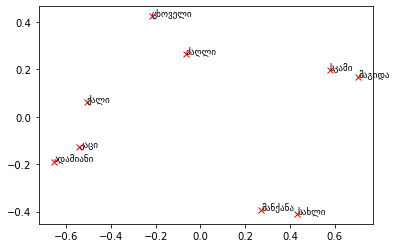

In [16]:
import matplotlib.pyplot as plt

for txt, (x, y) in zip(words, vecs_2d):
    plt.plot(x, y, 'rx')
    plt.text(x, y, txt, fontsize=9)
        
plt.show()

გამოიკვეთა 4 ლოგიკური კლასტერი: 
</br>1) ქალი, კაცი, ადამიანი
</br>2) ცხოველი, ძაღლი
</br>3) სკამი, მაგიდა
</br>4) მანქანა, სახლი

<center><h3>Part II - LSTM Model Trained Embeddings Loaded into Word2Vec</h3></center>

In [17]:
lstm_trained_embedding_word2vec = KeyedVectors.load_word2vec_format("../resources/trained_word2vec_embeddings", binary=False)

<center><h3>Evaluation</h3></center>
<center><h4>Synonyms</h4></center>


In [18]:
lstm_trained_embedding_word2vec.most_similar('მანქანა')

C:\Users\besik.kapanadze\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:850: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('ავტომობილი', 0.7495384216308594),
 ('მანქანით', 0.696967601776123),
 ('მანქანის', 0.6814539432525635),
 ('ავტომანქანა', 0.6434352397918701),
 ('ყუთი', 0.6389243006706238),
 ('გემი', 0.6305728554725647),
 ('თვითმფრინავი', 0.6298761963844299),
 ('კარები', 0.6153647899627686),
 ('სარეცხი', 0.6118815541267395),
 ('სარეცხის', 0.6110800504684448)]

In [19]:
lstm_trained_embedding_word2vec.most_similar('კაცი')

[('ბიჭი', 0.7427014112472534),
 ('ქალი', 0.7313578128814697),
 ('ადამიანი', 0.7084077596664429),
 ('გოგო', 0.7048305869102478),
 ('პოლიციელი', 0.6688650250434875),
 ('კაცს', 0.6588519811630249),
 ('კაციც', 0.6536153554916382),
 ('ყმაწვილი', 0.6511042714118958),
 ('ქალია', 0.6386712789535522),
 ('გოგონა', 0.6384297609329224)]

სინონიმებზე თითქმის იდენტური შედეგი გვაქვს.

<center><h4>Antonyms</h4></center>

In [20]:
lstm_trained_embedding_word2vec.most_similar('ღარიბი')

[('მდიდარი', 0.7786048054695129),
 ('კეთილშობილი', 0.7134513854980469),
 ('გაჭირვებული', 0.711959183216095),
 ('გონიერი', 0.7021375894546509),
 ('ხანდაზმული', 0.6860806941986084),
 ('განებივრებული', 0.6853086948394775),
 ('განათლებული', 0.6784356236457825),
 ('მოსიყვარულე', 0.6737260222434998),
 ('მიმზიდველი', 0.6729462742805481),
 ('ასაკოვანი', 0.6720113158226013)]

In [21]:
lstm_trained_embedding_word2vec.most_similar('სუსტი')

[('ძლიერი', 0.7172658443450928),
 ('მგრძნობიარე', 0.7061609625816345),
 ('სუსტად', 0.6878873705863953),
 ('მომთხოვნი', 0.6765154600143433),
 ('მიმზიდველი', 0.6722279787063599),
 ('მტკივნეული', 0.6672211289405823),
 ('მკაცრი', 0.6665281653404236),
 ('დამღუპველი', 0.6653798818588257),
 ('უმნიშვნელო', 0.6601188778877258),
 ('დაბალი', 0.6579921245574951)]

In [22]:
lstm_trained_embedding_word2vec.most_similar('თხელი')

[('სქელი', 0.9076801538467407),
 ('წვრილი', 0.8908844590187073),
 ('არომატული', 0.8826086521148682),
 ('მშრალი', 0.8805038332939148),
 ('გლუვი', 0.8803940415382385),
 ('მუქი', 0.8757079243659973),
 ('რბილი', 0.8694708943367004),
 ('მკვრივი', 0.8649117946624756),
 ('სურნელოვანი', 0.8512817621231079),
 ('ფხვნილი', 0.8416090607643127)]

აქაც, ანალოგიური შედეგი მივიღეთ.

<center><h4>Analogies</h4></center>

In [23]:
lstm_trained_embedding_word2vec.most_similar(positive=['ქალი', 'ბაბუა'], negative=['კაცი'])

[('ბებია', 0.7615781426429749),
 ('ქალიშვილი', 0.7355223298072815),
 ('რძალი', 0.7130419611930847),
 ('შეყვარებული', 0.7039543986320496),
 ('ქმარი', 0.6929221749305725),
 ('უსაყვარლესი', 0.6868669390678406),
 ('ინდოელი', 0.6825085282325745),
 ('ცოლი', 0.6781370043754578),
 ('ტრანსგენდერი', 0.6654087901115417),
 ('ორსული', 0.6621125936508179)]

In [24]:
lstm_trained_embedding_word2vec.most_similar(positive=['ქმარი', 'ქალი'], negative=['კაცი'])

[('ცოლი', 0.7714178562164307),
 ('ქალიშვილი', 0.7632574439048767),
 ('რძალი', 0.7275955677032471),
 ('მეუღლე', 0.7255292534828186),
 ('შეყვარებული', 0.7049375176429749),
 ('ბებია', 0.6956550478935242),
 ('შვილი', 0.6943869590759277),
 ('დედა', 0.6885172128677368),
 ('ქალბატონი', 0.6710808873176575),
 ('მამაკაცი', 0.6689496636390686)]

In [25]:
lstm_trained_embedding_word2vec.most_similar(positive=['კაცი', 'დედა'], negative =['ქალი'])

[('მამა', 0.6966497898101807),
 ('ძმა', 0.6835110783576965),
 ('მღვდელი', 0.6759638786315918),
 ('ყრმა', 0.6744189262390137),
 ('მწყემსი', 0.6697568893432617),
 ('დედ', 0.6549163460731506),
 ('კაციც', 0.6480010151863098),
 ('დეიდა', 0.646030068397522),
 ('დედაკაცი', 0.6448473930358887),
 ('დავითი', 0.644156813621521)]

ანალოგიების დროსაც იდენტური შედეგი გვაქვს.

<center><h4>Wrong Answer on Simple Query</h4></center>

In [26]:
lstm_trained_embedding_word2vec.most_similar(positive=['ძმაკაცი', 'ქალი'], negative=['კაცი'])

[('რძალი', 0.7526870369911194),
 ('უსაყვარლესი', 0.7524978518486023),
 ('შეყვარებული', 0.7212784290313721),
 ('ქალიშვილი', 0.7014584541320801),
 ('ქმარი', 0.6968770623207092),
 ('ცოლი', 0.6897458434104919),
 ('დაქალი', 0.6808561682701111),
 ('მუზა', 0.672867476940155),
 ('კლასელი', 0.6710400581359863),
 ('ბებია', 0.6649258732795715)]

ამ შემთხვევაში გვაქვს გაუარესება, რადგან სწორი პასუხის პოზიციამ გადაინაცვლა ქვემოთ.

<center><h4>Clusters Plotting</h4></center>

In [27]:
words = ['მაგიდა', 'სკამი', 'სახლი', 'ადამიანი', 'კაცი', 'ქალი', 'ცხოველი', 'ძაღლი', 'მანქანა']
word_2_vecs = []
for word in words :  
    word_2_vecs.append(lstm_trained_embedding_word2vec.get_vector(word))
    
vecs_normalized = normalize(word_2_vecs)

pca = PCA(n_components=2)
vecs_2d = pca.fit_transform(vecs_normalized)

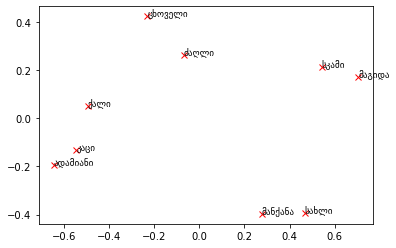

In [28]:
import matplotlib.pyplot as plt

for txt, (x, y) in zip(words, vecs_2d):
    plt.plot(x, y, 'rx')
    plt.text(x, y, txt, fontsize=9)
        
plt.show()

რათქმაუნდა, აქაც ანალოგიური შედეგი მივიღეთ.

<center><h4>Conclusion</h4></center>

ჩატარებული ექსპერიმენტიდან, ჩანს რომ ემბედინგების დასწავლამ მიზერული სხვაობა მოგვცა, ზოგ შემთვევაში კი გაგვიუარესა მოდელი. სავარაუდოდ კონკრეტულ მაგალითებში არ გამოჩნდა გაუმჯობესებული შედეგი. უარყოფითი წარმადობა კი, ალბათ, გამოწვეულია lstm მოდელის bias-ით.